<a href="https://colab.research.google.com/github/dedemasutti/Machine-Learning/blob/main/Machine_learning_para_manuten%C3%A7%C3%A3o_preditiva_de_sensores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acurácia do modelo: 0.85
Matriz de Confusão:
[[186  18]
 [ 14   2]]


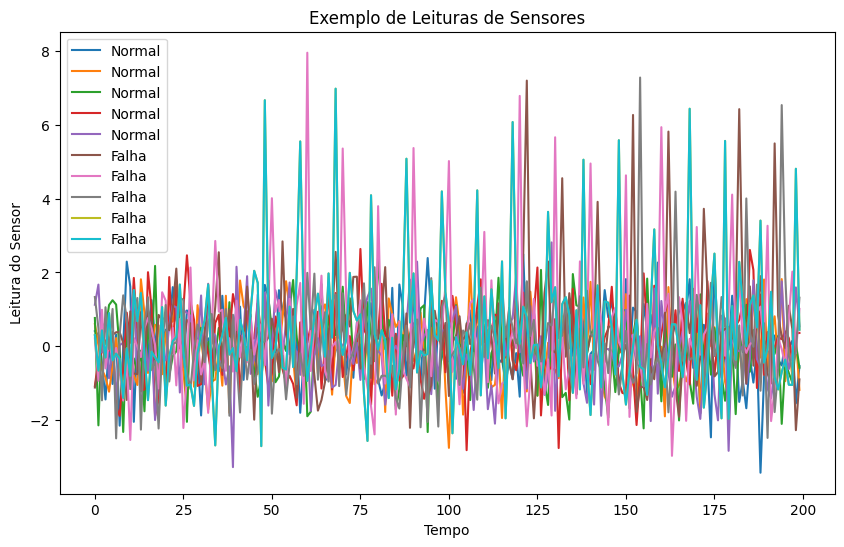

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px

# Simulando dados de sensores
np.random.seed(0)
n_samples = 1000
n_features = 10
n_time_steps = 20

# Criando dados normais (0)
normal_data = np.random.normal(0, 1, (n_samples, n_time_steps, n_features))
normal_labels = np.zeros(n_samples)

# Introduzindo falhas aleatórias (1)
n_faults = int(n_samples * 0.1)  # 10% de falhas
faulty_samples = np.random.choice(n_samples, n_faults, replace=False)
for idx in faulty_samples:
    time_idx = np.random.randint(n_time_steps)
    feature_idx = np.random.randint(n_features)
    normal_data[idx, time_idx:, feature_idx] += np.random.normal(5, 1, (n_time_steps - time_idx,))

faulty_labels = np.ones(n_faults)

# Combinando dados normais e defeituosos
X = np.concatenate((normal_data, normal_data[faulty_samples]), axis=0)
y = np.concatenate((normal_labels, faulty_labels))

# Reshape dos dados para o formato (n_samples, n_features * n_time_steps)
X = X.reshape(-1, n_features * n_time_steps)

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando um modelo SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Acurácia do modelo: {accuracy:.2f}")
print("Matriz de Confusão:")
print(conf_matrix)

# Plotando algumas leituras de sensores
plt.figure(figsize=(10, 6))
plt.plot(X_test[y_pred == 0][:5].T, label="Normal")
plt.plot(X_test[y_pred == 1][:5].T, label="Falha")
plt.xlabel("Tempo")
plt.ylabel("Leitura do Sensor")
plt.title("Exemplo de Leituras de Sensores")
plt.legend()
plt.show()



In [4]:
# Plotando leituras de sensores de forma interativa
num_samples_to_plot = 5

fig = px.line()
for idx in range(num_samples_to_plot):
    if y_pred[idx] == 0:
        label = "Normal"
    else:
        label = "Falha"
    for feature_idx in range(n_features):
        fig.add_scatter(x=np.arange(n_time_steps), y=X_test[idx, feature_idx::n_features], mode='lines', name=f'{label} - Sensor {feature_idx + 1}')

fig.update_layout(
    xaxis_title="Tempo",
    yaxis_title="Leitura do Sensor",
    title="Leituras de Sensores ao Longo do Tempo",
    showlegend=True,
    legend_title="Status"
)
fig.show()
